# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



# Background

PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

# Dataset

- **product_id**: Nominal. The unique identifier of the product. Missing values are not possible due to the database structure.
- **category**: Nominal. The category of the product, one of 6 values (Housing,Food, Toys, Equipment, Medicine, Accessory).
- **animal**: Nominal. The type of animal the product is for. One of Dog, Cat,Fish, Bird. Missing values should be replaced with “Unknown”.
- **size**: Ordinal. The size of animal the product is for. Small, Medium,Large. Missing values should be replaced with “Unknown”.
- **price**: Continuous. The price the product is sold at. Can be any positive value, round to 2 decimal places.Missing values should be replaced with the overall median price.
- **sales**: Continuous. The value of all sales of the product in the last year.This can be any positive value, rounded to 2 decimal places. Missing values should be replaced with the overall median sales
- **rating**: Discrete. Customer rating of the product from 1 to 10.Missing values should be replaced with 0.
- **repeat_purchase**: Nominal. Whether customers repeatedly buy the product (1) or not (0). Missing values should be removed.

# Tasks

1. For every column in the data:
-  State whether the values match the description given in the table above.
-  State the number of missing values in the column.
-  Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many products are repeat purchases. Use the
visualization to:
- State which category of the variable repeat purchases has the most
observations
- Explain whether the observations are balanced across categories of the
variable repeat purchases

3. Describe the distribution of all of the sales. Your answer must include a visualization
that shows the distribution.

4.  Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship

## Task 1



For every column in the data:
-  State whether the values match the description given in the table above.
-  State the number of missing values in the column.
-  Describe what you did to make values match the description if they did not match.

### Overview

There are some columns that have missing values in the following format:
- Twenty five (25) null values in category in the form of '-'
- 'unlisted' found in price column
- One hundred and fifty (150) null values in rating

Additionally, the size column has a mix of uppercase and lowercase  

### Getting Started

In [30]:
## import csv file
import numpy as np
import pandas as pd
df = pd.read_csv("pet_supplies_2212.csv")

df.head(20)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0
8,9,Equipment,Fish,MEDIUM,17.82,503.67,5.0,0
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0


In [31]:
## there are 1500 rows and 8 columns
df.shape

(1500, 8)

In [32]:
product = df['product_id'].isnull().values.any()
print(product)

False


- No null values in product_id

In [33]:
category1 = df['category'].isnull().values.any()
category1
six_categories = df[df['category'].isin(['-'])]
six_categories.count()


product_id         25
category           25
animal             25
size               25
price              25
sales              25
rating             21
repeat_purchase    25
dtype: int64

- 25 null values in category 

### Handling missing values in category column

In [34]:
df['category'] = df['category'].str.replace('-', 'Unknown')
six_categories.count()

product_id         25
category           25
animal             25
size               25
price              25
sales              25
rating             21
repeat_purchase    25
dtype: int64

In [35]:
animal1 = df['animal'].isnull().values.any()
animal1

False

- no null values in animal

In [36]:
size1 = df['size'].isnull().values.any()
size1

False

- no null values in size

In [37]:
## capitalize values in size 
df['size'] = df['size'].str.capitalize()
print(df['size'])

0        Large
1       Medium
2       Medium
3        Small
4        Small
         ...  
1495    Medium
1496     Small
1497     Small
1498     Small
1499    Medium
Name: size, Length: 1500, dtype: object


In [38]:
price1 = df['price'].isnull().values.any()
price1

False

- no null values in price

In [39]:
price2 = df[df['price'].isin(['unlisted'])]
price2.count()

product_id         150
category           150
animal             150
size               150
price              150
sales              150
rating               0
repeat_purchase    150
dtype: int64

- 'unlisted' found in price column

### Handling missing values in price column

In [40]:
median1 = pd.to_numeric(df['price'], errors='coerce').median()
df['price'] = pd.to_numeric(df['price'], errors='coerce').replace(np.nan, median1)
df['price'] = df['price'].round(2) #rounded to decimal places
df['price']

0       51.10
1       35.98
2       31.23
3       24.95
4       26.18
        ...  
1495    40.91
1496    32.89
1497    25.79
1498    19.94
1499    25.95
Name: price, Length: 1500, dtype: float64

In [41]:
sales1 = df['sales'].isnull().values.any()
sales1
df['sales'] = df['sales'].round(2) #rounded to two decimal places
df['sales']


0       1860.62
1        963.60
2        898.30
3        982.15
4        832.63
         ...   
1495    1203.36
1496    1099.97
1497     724.02
1498     658.66
1499     826.08
Name: sales, Length: 1500, dtype: float64

- no null values in sales

In [42]:
rating1 = df['rating'].isnull().values.any()
rating1
df['rating'].isnull().values.sum()

150

- 150 null values in rating

### Handling missing values in rating column

In [43]:
## replace null values
rating2 = df['rating'].fillna(df.rating.median(), inplace=True) #null values replace with overall median sales
rating2


In [44]:
repeat_purchase1 = df['repeat_purchase'].isnull().values.any()
repeat_purchase1

False

In [45]:
## convert df to csv to have a final look with excel
df.to_csv('new_pet.csv')

## Task 2

Create a visualization that shows how many products are repeat purchases. Use the
visualization to:
- State which category of the variable repeat purchases has the most observations
- Explain whether the observations are balanced across categories of the variable repeat purchases

### Solution

We've been told that PetMind sells the items in the **category** column. -- this is our products variable.
Now, we want to know how many are **repeat variables**

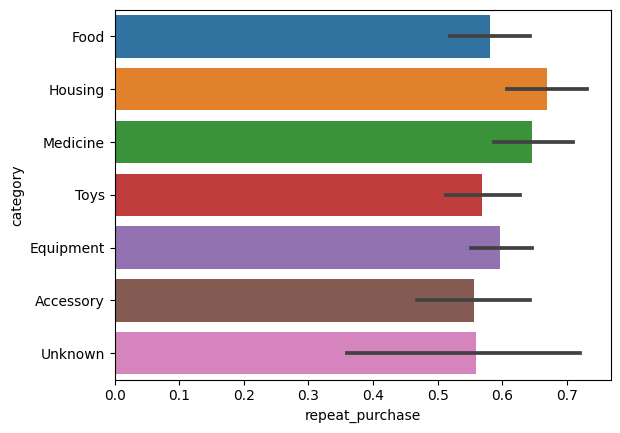

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(data=df, x='repeat_purchase', y='category')
plt.show()

Housing is the most repeated purchase product. Followed by Medicine and Equipment.
Food, being an everyday product, is around the same level as Toys and Accessory.

## Task 3

Describe the distribution of all of the sales. Your answer must include a visualization
that shows the distribution.

### Solution

Here we are looking at the sales variable.

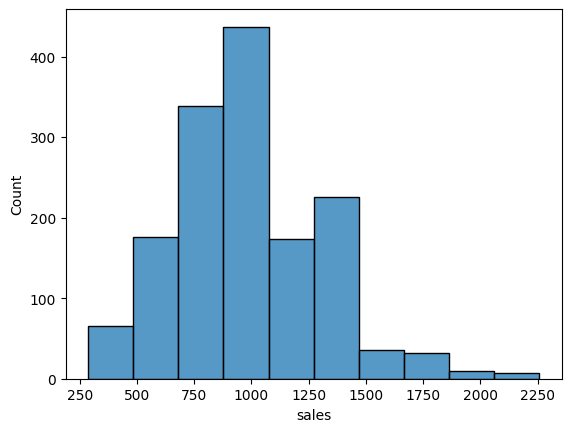

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#palette_color = sns.color_palette('dark')
sns.histplot(data=df, x='sales', bins=10)
plt.show()

Most sales are within 1000. However, we need some insight as to which animal contributes to the highest sales.

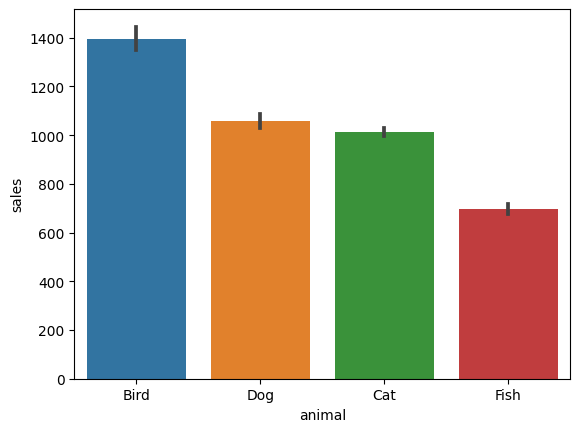

In [48]:
sns.barplot(data=df, x='animal', y='sales')
plt.show()

Our products are bought mostly because of Birds followed by Dog and Cat and fish has the least. 

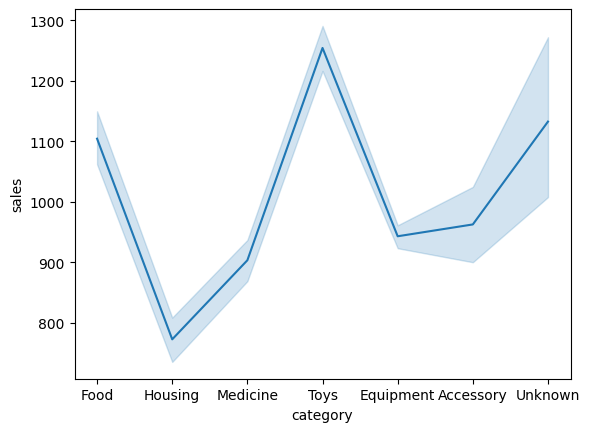

In [49]:
sns.lineplot(data=df, x='category', y='sales')
plt.show()

Unlike the repeated purchase, here the category that has the highest sales is not Housing but Toys. And food, an everyday product, has high sales too. Soon, we'll find the correlation between sales and repeated purchase.

## Task 4

Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship

### Solution

Here we find out the relationship between sales and repeated purchase

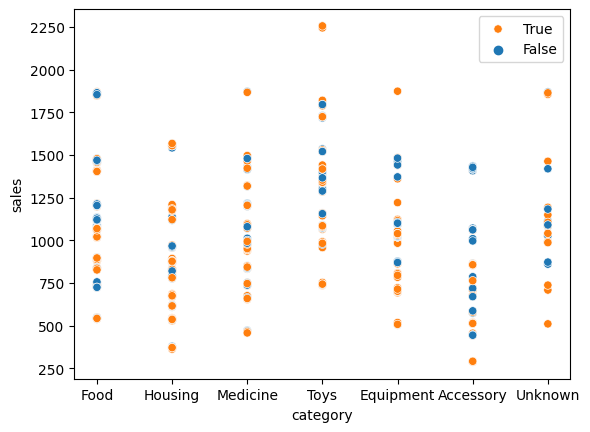

In [50]:
sns.scatterplot(data=df, hue='repeat_purchase', x='category', y='sales')
plt.legend(["True", "False"])
plt.show()

From the legend we can see that **orange is for true** and **blue for false** (in the case of repeat purchase). Having a look at plot above, we'll see there indeed exist a relationship between sales and repeat purchase of PetMind's products.This is especially true for Housing and Medicine. 
Therefore, we can say repeat sales positively affects sales.

# Conclusion

- Housing is the most repeated purchase
- Sales was at its peak around 1000 and the animal that contributed to that the most is bird
- Toys has the highest number of sales throughout the year.
- Food, an everyday product, also has high sales.
- Repeat purchase has a strong impact on sales.
- Based on this findings, PetMind can rest assured that customers will make repeat purchase and their approach is working.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam